# Instructions

1. Add your name and HW Group Number below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
3. Where applicable, run the test cases *below* each question to check your work. **Note**: In addition to the test cases you can see, the instructor may run additional test cases, including using *other datasets* to validate you code.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting. **Also** make sure to turn in your homework on Moodle (so we have a backup copy).



In [1]:
"""
Name: Sagnik
HW Group Number: 32 
"""

'\nName: Sagnik\nHW Group Number: 32 \n'

## Homework 1: Problem 3: Distance Metrics

### Import all necessary libraries

In [2]:
# you should be familiar with numpy, pandas and matplotlib from HW0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set some env variables for plotting for easy visualization
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100 

# we will use the iris dataset from sklearn.datasets
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [3]:
iris_sk = datasets.load_iris()
# let's scale the data to [0, 1] range to ensure that all the features are in the same range.
iris_sk.data = MinMaxScaler().fit_transform(iris_sk.data)

# we'll be using the iris_df dataframe for visualization later
iris_df = pd.DataFrame(iris_sk.data, columns=iris_sk.feature_names)
# add class variable. Now, the iris dataframe (iris_df) also incldues the nominal class variable indicating 
# the species for each data point. 
iris_df['Species'] = iris_sk.target

# let's extract two random rows from the dataset. We'll use these rows for the distance metric calculations.
p = iris_sk.data[10, :]
q = iris_sk.data[50, :]


# Distance Measures

In the following exercises, you will be writing code to calculate different distance metrics. 

Familiarize yourselves with [vectorized operations](https://www.youtube.com/watch?v=HLOB2_Imqbw) in numpy before you work on this exercise. 

***Important 1:*** Please note that you are being asked to implement these metrics, not use the pre-defined methods from the library. 

The definitions of each of the distances are as specified below. Read them carefully before implementing your code.
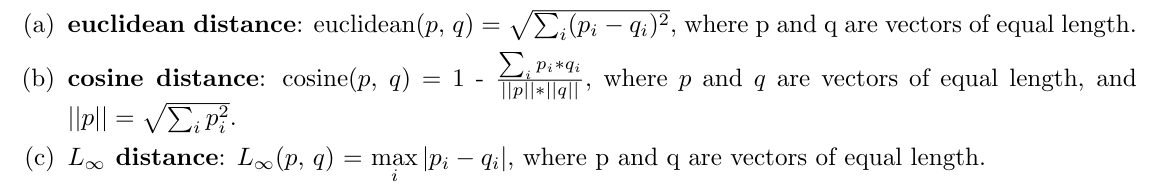
   

## Problem 3.1: Euclidean Distance

In [4]:
# Problem a: Euclidean Distance

def calculate_euclidean_distance(p , q):
    """
    Input: p and q are two numpy vectors of same dimensions. 
    Output: a single floating point value contaning the euclidean 
            distance between p and q
    
    Allowed numpy functions: sum, square, sqrt
    """
    output = np.sqrt( np.sum( np.square(p - q) ) )
    return output

In [5]:
# Test your function!
calculate_euclidean_distance(p, q)

0.886059808594005

In [11]:
np.testing.assert_almost_equal(calculate_euclidean_distance(iris_sk.data[10, :], iris_sk.data[50, :]), 0.886059808594005)
np.testing.assert_almost_equal(calculate_euclidean_distance(iris_sk.data[20, :], iris_sk.data[30, :]), 0.20902165330338965)

## Problem 3.2: Cosine Distance

In [6]:
# Problem b: Cosine Distance

def calculate_cosine_distance(p, q):
    """
    Input: p and q are two numpy vectors of same dimensions. 
    Output: a single floating point value contaning the 
            cosine distance between p and q. 
    
    
    Allowed numpy functions: dot, sum, square, sqrt
    """

    output = 1 - (np.dot(p, q) / (np.sqrt(np.sum( np.square(p) )) * np.sqrt(np.sum( np.square(q) ))))
                  
    return output


In [7]:
# Test your function!
calculate_cosine_distance(p, q)

0.30742737919915586

In [8]:
np.testing.assert_almost_equal(calculate_cosine_distance(iris_sk.data[10, :], iris_sk.data[50, :]), 0.30742737919915586)
np.testing.assert_almost_equal(calculate_cosine_distance(iris_sk.data[30, :], iris_sk.data[40, :]), 0.0094425471128603)
np.testing.assert_almost_equal(calculate_cosine_distance(iris_sk.data[1, :], iris_sk.data[1, :]), 0)

## Problem 3.3: Supremum Distance

In [9]:
# Problem c: l_inf distance

def calculate_l_inf_distance(p, q):
    """
    Input: p and q are two numpy vectors of same dimensions. 
    Output: a single floating point value contaning the cosine distance between p and q. 
    
    Allowed numpy functions: max, abs
    
    """
    assert(len(p) == len(q))
    return np.abs( p - q ).max()
    

In [10]:
# Test your function!
calculate_l_inf_distance(p, q)

0.5423728813559322

In [11]:
np.testing.assert_almost_equal(calculate_l_inf_distance(iris_sk.data[10, :], iris_sk.data[50, :]), 0.5423728813559322)
np.testing.assert_almost_equal(calculate_l_inf_distance(iris_sk.data[30, :], iris_sk.data[40, :]), 0.16666666666666674)
np.testing.assert_almost_equal(calculate_l_inf_distance(iris_sk.data[1, :], iris_sk.data[1, :]), 0)

## Problem 3.4: Interpretation of distances

The [```pairwise_distances```](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html)  function computes pairwise distances between every data point. Using this method, we compute the 150 x 150 distance matrix and then visualize this matrix. Study the distance matrix plots for each distance metric produced in the next cell and answer the questions in the final cell.

***Important***: Please note that we're already giving you code for this method. 

<Figure size 2000x2000 with 0 Axes>

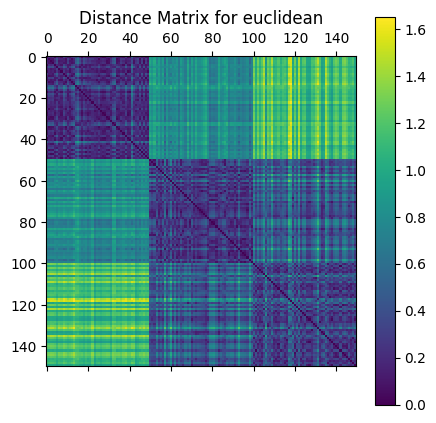

<Figure size 2000x2000 with 0 Axes>

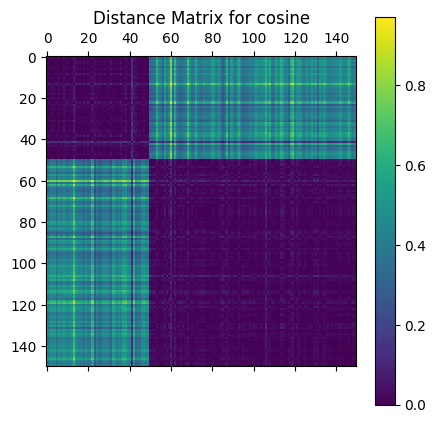

<Figure size 2000x2000 with 0 Axes>

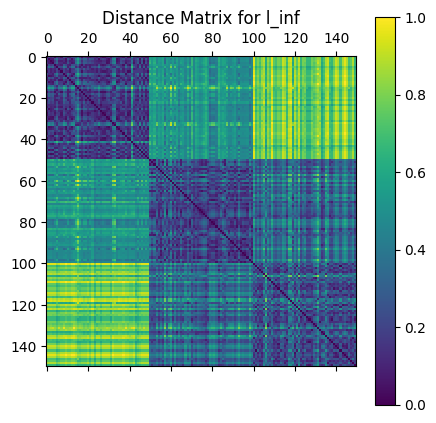

In [12]:

from sklearn.metrics import pairwise_distances

def plot_distance_matrix(distance_metric, title):
    # calculate the distance matrix
    distance_matrix = pairwise_distances(iris_sk.data, metric=distance_metric)
    # plot the distance matrix
    plt.figure(figsize=(20,20))
    plt.matshow(distance_matrix)
    plt.colorbar()
    plt.title(f'Distance Matrix for {title}')
    plt.show()
    print('\n\n\n\n')
    
for distance_function, distance_name in zip([calculate_euclidean_distance, calculate_cosine_distance, calculate_l_inf_distance],
                                           ['euclidean', 'cosine', 'l_inf']):
    plot_distance_matrix(distance_function, distance_name)

##### Answer the following questions using [markdown](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook) in the cell below.
If you're not comfortable using markdown, just use plain text.

#### Questions:
In the distance matrix, the first 50 values belong to class 0, the next 50 to class 1 and the last 50 to the third class. 
Based on this information and using the plots given above, answer the following questions:

1) Explain the "checkered" pattern (3x3 squares) you see in the visualization of each distance matrix. Why does this pattern emerge?

2) Which distance metric do you think best separates all the three classes? Briefly explain you answer. *Note*: There may be multiple acceptable answers.

1) 
2) The distance matrix for cosine distance best seperates the three classes since we have well definded areas within the distance matrix for the three classes.

**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub and Moodle.